In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import pickle
import math
import networkx as nx
import numpy as np
import random
import time
import statistics
from itertools import chain 

In [ ]:
G1 = nx.read_edgelist('/content/drive/MyDrive/friends_inside_29842742.txt')
node_count = len(list(G1.nodes()))
print('Число вершин:', node_count)
print('Число связей:', len(list(G1.edges())))
print('Кластерный коэффициент: ', nx.average_clustering(G1))
all_possible_count = int(node_count*(node_count - 1)/2)
print('Число всех возможных связей: ', all_possible_count)

Число вершин: 14767
Число связей: 15063
Кластерный коэффициент:  0.01613295677107348
Число всех возможных связей:  109024761


In [ ]:
L_connected_subgraphs = []
connected_graphs = list((G1.subgraph(c) for c in nx.connected_components(G1)))
for x in connected_graphs:    
    if len(x) < 5:
        continue
    path_length = nx.average_shortest_path_length(x)
    L_connected_subgraphs.append(path_length)
    
L = np.mean(L_connected_subgraphs)
print("Средняя длина пути = ", L)

Средняя длина пути =  1.8956773057166372


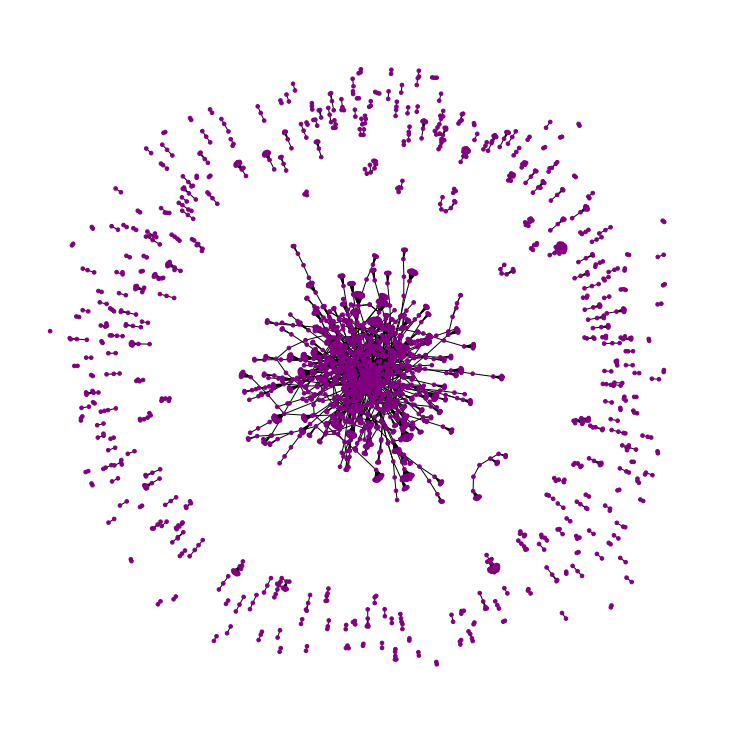

In [ ]:
G1_to_draw = G1.subgraph(list(G1.nodes())[:3000])
point_size = 13
point_color = 'purple'
edge_size = 2
color_map = []
for node in G1_to_draw:
    color_map.append(point_color)
size_map = []
for i in nx.get_edge_attributes(G1_to_draw,'weight').values():
    size_map.append(edge_size)

### Как-то отвечает за размер графика
plt.figure(3,figsize=(10,10)) 
###

nx.draw(G1_to_draw, node_size=point_size, node_color=color_map, width=size_map, pos=nx.spring_layout(G1_to_draw))
plt.show()

In [ ]:
# Функция построения графика распределения степеней вершин в графе
def draw_nodes_degree_distribution(G):
    degree = dict(G.degree())
    degree_values = sorted(set(degree.values()))
    hist = [list(degree.values()).count(x) for x in degree_values]
    plt.plot(degree_values, hist, 'ro-')
    plt.xlabel("Количество связей")
    plt.ylabel("Количество вершин")
    plt.title("Распределение степеней графов")

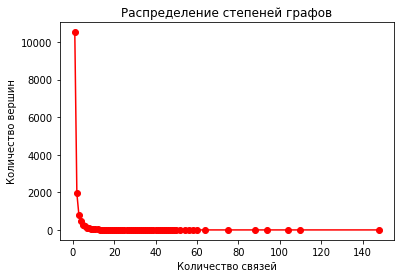

In [ ]:
draw_nodes_degree_distribution(G1)

In [ ]:
# Получение коэффициентов схожести графа с моделью Малого мира
def small_world_similarity(G):
    L_s, C_s = [], []

    ### исходные параметры
    L = 1.895677
    C = 0.016133
    ###

    for i in range(1):
        connected_components_count = 10
        while connected_components_count != 1:

            ### 2 и 3 параметры изменяемые
            generated_G = nx.watts_strogatz_graph(len(G), 4, 0.5)
            ###

            A = (generated_G.subgraph(c) for c in nx.connected_components(generated_G))
            A = list(A)            
            connected_components_count = len(A)
            
        print("Вершины = ", nx.number_of_edges(G), "Связи = ", nx.number_of_edges(generated_G))        
        L_s_ = nx.average_shortest_path_length(generated_G)
        C_s_ = nx.average_clustering(generated_G)
        print("L_mm = ", L_s_)
        print("C_mm = ", C_s_)
        L_s.append(L_s_)
        C_s.append(C_s_)
        draw_nodes_degree_distribution(generated_G)
    
    lambda_ = L / np.mean(L_s)
    gamma_ = C / np.mean(C_s)
    return generated_G

Вершины =  15063 Связи =  29534
L_mm =  7.9569235836251915
C_mm =  0.06861035062091624


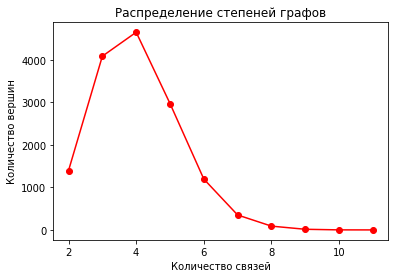

In [ ]:
cmWorld = small_world_similarity(G1)

In [ ]:
# Получение коэффициентов схожести графа с моделью Эрдоша-Реньи (случайный граф)
def erdos_renyi_similarity(G):
    er_graph = nx.erdos_renyi_graph(len(G), p=node_count/all_possible_count) 
    draw_nodes_degree_distribution(er_graph)
    L_connected_subgraphs = []
    connected_graphs = list((er_graph.subgraph(c) for c in nx.connected_components(er_graph)))
    for x in connected_graphs:
        path_length = nx.average_shortest_path_length(x)
        L_connected_subgraphs.append(path_length)
    
    L = np.mean(L_connected_subgraphs)
    C = nx.average_clustering(er_graph)
    print("L_er = ", L)
    print("С_er = ", C)

    plt.show()

L_er =  0.18456867077657574
С_er =  0.00014220897948127582


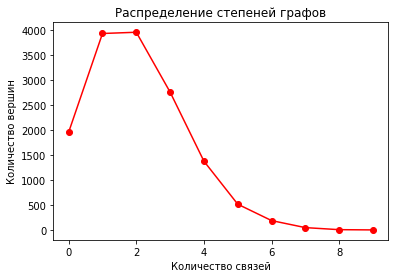

In [ ]:
erdos_renyi_similarity(G1)

In [ ]:
def barabasi_albert_similarity(G):
    ### 2 параметр изменяемый
    ba_graph = nx.barabasi_albert_graph(len(G), 2)
    ###
    L = nx.average_shortest_path_length(ba_graph)
    C = nx.average_clustering(ba_graph)
    draw_nodes_degree_distribution(ba_graph)
    print('L_ba =', L)
    print('C_ba =', C)
    print('Связи = ', len(list(ba_graph.edges())))
    return ba_graph

L_ba = 5.165967628216126
C_ba = 0.003635387647333804
Связи =  29530


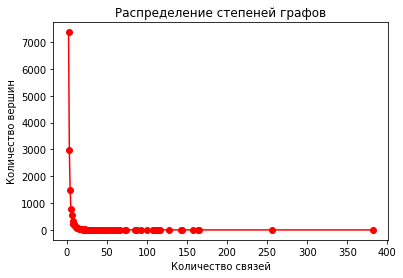

In [ ]:
baGraph = barabasi_albert_similarity(G1)

In [ ]:
### Свои значения - исходные и рассчитанные
C = 0.016133
L = 1.895677
E = 15063

#------
# 1 параметр = 3
# Cm = 0.0
# Lm = 131.3903883999342
# Em = 14767

# 1 параметр = 4
Cm = 0.07860958744347467
Lm = 8.035260641387694
Em = 29534

#-------
# параметр = 5
# Cb = 0.005469077321709941
# Lb = 3.7570533908347663
# Eb = 73810

# параметр = 2
Cb = 0.003635387647333804
Lb = 5.165967628216126
Eb = 29530
### 

In [ ]:
def otnos_error(fact, approx):
    return abs(fact-approx)/fact

In [ ]:
# baGraph, cmWorld
degreeBA = dict(baGraph.degree())
degree_valuesBA = sorted(set(degreeBA.values()))
histBA = [list(degreeBA.values()).count(x) for x in degree_valuesBA]

degreeSW = dict(cmWorld.degree())
degree_valuesSW = sorted(set(degreeSW.values()))
histSW = [list(degreeSW.values()).count(x) for x in degree_valuesSW]

degree = dict(G1.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]

sum = 0
for x in range(201):
    if x not in degree_values:
        continue
    if x not in degree_valuesBA:
        valueBA = 0
    else:
        indexBA = degree_valuesBA.index(x)
        valueBA = histBA[indexBA]
    value_real = hist[degree_values.index(x)]
    sum += otnos_error(value_real, valueBA)
Eba = sum / 200
print(Eba)

sum = 0
for x in range(201):
    if x not in degree_values:
        continue
    if x not in degree_valuesSW:
        valueSW = 0
    else:
        indexSW = degree_valuesSW.index(x)
        valueSW = histSW[indexSW]
    value_real = hist[degree_values.index(x)]
    sum += otnos_error(value_real, valueSW)
Esw = sum / 200
print(Esw)

0.45339468186912213
0.4312435961109732


In [ ]:
EEsw = otnos_error(C, Cm) + otnos_error(L, Lm) + otnos_error(E, Em) + Esw
EEba = otnos_error(C, Cb) + otnos_error(L, Lb) + otnos_error(E, Eb) + Eba
print('EEsw=', EEsw)
print('EEba=', EEba)

EEsw= 8.503266530610738
EEba= 3.913619649900462
